In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def imshow(title = "Image", image=None, size=10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# Download and unzip our videos and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq haarcascades.zip
!unzip -qq videos.zip

--2023-01-13 11:34:15--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4142728 (4.0M) [application/zip]
Saving to: ‘videos.zip’

videos.zip          100%[===================>]   3.95M  5.85MB/s    in 0.7s    

2023-01-13 11:34:16 (5.85 MB/s) - ‘videos.zip’ saved [4142728/4142728]

--2023-01-13 11:34:16--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.10|:443... connected.
HTTP req

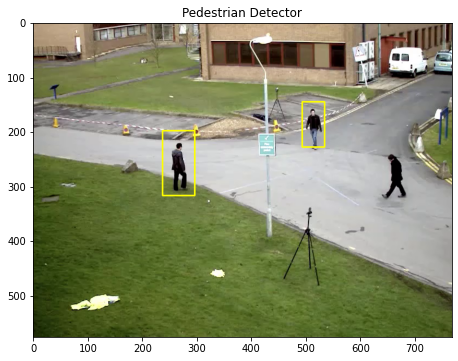

In [3]:
cap = cv2.VideoCapture('walking.mp4')

body_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

#it reads the 1st frame
ret, frame = cap.read()

#now we have to check ret if it reads succesfully

if ret: 
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  #now we have to pass our frame to body classifier

  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

  #now we have to extract bounding boxes for identified bodies.

  for (x,y,w,h) in bodies:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 255), 2)

cap.release()
imshow("Pedestrian Detector", frame)    

In [4]:
# now we create our video capturing object
cap = cv2.VideoCapture('walking.mp4')

# Get the height and width of the frame 
w = int(cap.get(3))
h = int(cap.get(4))

out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

body_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # now we pass our frame to our body classifier
    bodies = body_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for identified bodies
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    
    out.write(frame)
  else:
      break

cap.release()
out.release()

In [5]:
!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li